<a href="https://colab.research.google.com/github/neeraj-pola/diet-plan-scheduler-using-ai/blob/main/Diet_plan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
!pip install PuLP
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pulp import *

In [ ]:
df = pd.read_csv("nutrition.csv")

In [ ]:
df.head()

,Unnamed: 0,name,serving_size,calories,total_fat,saturated_fat,cholesterol,sodium,choline,folate,...,fat,saturated_fatty_acids,monounsaturated_fatty_acids,polyunsaturated_fatty_acids,fatty_acids_total_trans,alcohol,ash,caffeine,theobromine,water
0,0,Cornstarch,100 g,381,0.1g,NaN,0,9.00 mg,0.4 mg,0.00 mcg,...,0.05 g,0.009 g,0.016 g,0.025 g,0.00 mg,0.0 g,0.09 g,0.00 mg,0.00 mg,8.32 g
1,1,"Nuts, pecans",100 g,691,72g,6.2g,0,0.00 mg,40.5 mg,22.00 mcg,...,71.97 g,6.180 g,40.801 g,21.614 g,0.00 mg,0.0 g,1.49 g,0.00 mg,0.00 mg,3.52 g
2,2,"Eggplant, raw",100 g,25,0.2g,NaN,0,2.00 mg,6.9 mg,22.00 mcg,...,0.18 g,0.034 g,0.016 g,0.076 g,0.00 mg,0.0 g,0.66 g,0.00 mg,0.00 mg,92.30 g
3,3,"Teff, uncooked",100 g,367,2.4g,0.4g,0,12.00 mg,13.1 mg,0,...,2.38 g,0.449 g,0.589 g,1.071 g,0,0,2.37 g,0,0,8.82 g
4,4,"Sherbet, orange",100 g,144,2g,1.2g,1mg,46.00 mg,7.7 mg,4.00 mcg,...,2.00 g,1.160 g,0.530 g,0.080 g,1.00 mg,0.0 g,0.40 g,0.00 mg,0.00 mg,66.10 g


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8789 entries, 0 to 8788
Data columns (total 77 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Unnamed: 0                   8789 non-null   int64 
 1   name                         8789 non-null   object
 2   serving_size                 8789 non-null   object
 3   calories                     8789 non-null   int64 
 4   total_fat                    8789 non-null   object
 5   saturated_fat                7199 non-null   object
 6   cholesterol                  8789 non-null   object
 7   sodium                       8789 non-null   object
 8   choline                      8789 non-null   object
 9   folate                       8789 non-null   object
 10  folic_acid                   8789 non-null   object
 11  niacin                       8789 non-null   object
 12  pantothenic_acid             8789 non-null   object
 13  riboflavin                   8789

In [ ]:
df.drop("Unnamed: 0", axis=1,inplace=True)

In [ ]:
df.head()

,name,serving_size,calories,total_fat,saturated_fat,cholesterol,sodium,choline,folate,folic_acid,...,fat,saturated_fatty_acids,monounsaturated_fatty_acids,polyunsaturated_fatty_acids,fatty_acids_total_trans,alcohol,ash,caffeine,theobromine,water
0,Cornstarch,100 g,381,0.1g,NaN,0,9.00 mg,0.4 mg,0.00 mcg,0.00 mcg,...,0.05 g,0.009 g,0.016 g,0.025 g,0.00 mg,0.0 g,0.09 g,0.00 mg,0.00 mg,8.32 g
1,"Nuts, pecans",100 g,691,72g,6.2g,0,0.00 mg,40.5 mg,22.00 mcg,0.00 mcg,...,71.97 g,6.180 g,40.801 g,21.614 g,0.00 mg,0.0 g,1.49 g,0.00 mg,0.00 mg,3.52 g
2,"Eggplant, raw",100 g,25,0.2g,NaN,0,2.00 mg,6.9 mg,22.00 mcg,0.00 mcg,...,0.18 g,0.034 g,0.016 g,0.076 g,0.00 mg,0.0 g,0.66 g,0.00 mg,0.00 mg,92.30 g
3,"Teff, uncooked",100 g,367,2.4g,0.4g,0,12.00 mg,13.1 mg,0,0,...,2.38 g,0.449 g,0.589 g,1.071 g,0,0,2.37 g,0,0,8.82 g
4,"Sherbet, orange",100 g,144,2g,1.2g,1mg,46.00 mg,7.7 mg,4.00 mcg,0.00 mcg,...,2.00 g,1.160 g,0.530 g,0.080 g,1.00 mg,0.0 g,0.40 g,0.00 mg,0.00 mg,66.10 g


In [ ]:
df = df[['name','serving_size','calories','carbohydrate','total_fat','protein']]
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8789 entries, 0 to 8788
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          8789 non-null   object
 1   serving_size  8789 non-null   object
 2   calories      8789 non-null   int64 
 3   carbohydrate  8789 non-null   object
 4   total_fat     8789 non-null   object
 5   protein       8789 non-null   object
dtypes: int64(1), object(5)
memory usage: 412.1+ KB
None


,name,serving_size,calories,carbohydrate,total_fat,protein
0,Cornstarch,100 g,381,91.27 g,0.1g,0.26 g
1,"Nuts, pecans",100 g,691,13.86 g,72g,9.17 g
2,"Eggplant, raw",100 g,25,5.88 g,0.2g,0.98 g
3,"Teff, uncooked",100 g,367,73.13 g,2.4g,13.30 g
4,"Sherbet, orange",100 g,144,30.40 g,2g,1.10 g


In [ ]:
df.drop("serving_size", axis=1, inplace=True)

<ipython-input-10-cce32a67ee76>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop("serving_size", axis=1, inplace=True)


In [ ]:
df['carbohydrate'] = np.array([df['carbohydrate'].tolist()[i].split(' ') for i in range(len(df))])[:,0].astype('float')
df['protein'] = np.array([df['protein'].tolist()[i].split(' ') for i in range(len(df))])[:,0].astype('float')
df['total_fat'] = np.array([df['total_fat'].tolist()[i].split('g') for i in range(len(df))])[:,0].astype('float')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8789 entries, 0 to 8788
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          8789 non-null   object 
 1   calories      8789 non-null   int64  
 2   carbohydrate  8789 non-null   float64
 3   total_fat     8789 non-null   float64
 4   protein       8789 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 343.4+ KB


#Variegate

In [ ]:
week_days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
split_values_day = np.linspace(0,len(df),8).astype(int)
split_values_day[-1] = split_values_day[-1]-1
def random_dataset_day():
    frac_data = df.sample(frac=1).reset_index().drop('index',axis=1)
    day_data = []
    for s in range(len(split_values_day)-1):
        day_data.append(frac_data.loc[split_values_day[s]:split_values_day[s+1]])
    return dict(zip(week_days,day_data))

In [ ]:
random_dataset_day()["Tuesday"]

,name,calories,carbohydrate,total_fat,protein
1255,"Lamb, raw, trimmed to 1/8"" fat, separable lean...",195,0.00,13.0,18.85
1256,"Beef, grilled, cooked, choice, trimmed to 0"" f...",253,0.00,15.0,28.90
1257,"Lamb, raw, trimmed to 1/8"" fat, separable lean...",123,0.00,3.8,20.83
1258,"Animal fat, bacon grease",897,0.00,100.0,0.00
1259,"Fast foods, with condiments and vegetables, re...",251,21.20,13.0,12.80
...,...,...,...,...,...
2507,"Fish, dry heat, cooked, Atlantic, wolffish",123,0.00,3.1,22.44
2508,"Beef, braised, cooked, select, trimmed to 0"" f...",206,0.00,6.3,34.93
2509,"GLUTINO, Chocolate Vanilla Creme, Gluten Free ...",474,76.03,18.0,2.19
2510,"Orange juice, unsweetened, canned",47,11.01,0.2,0.68


In [ ]:
meals = ['Snack 1','Snack 2','Breakfast','Lunch','Dinner']
split_values_meal = np.linspace(0,split_values_day[1],len(meals)+1).astype(int)
split_values_meal[-1] = split_values_meal[-1]-1
def random_dataset_meal(data_day):
    frac_data = data_day.sample(frac=1).reset_index().drop('index',axis=1)
    meal_data = []
    for s in range(len(split_values_meal)-1):
        meal_data.append(frac_data.loc[split_values_meal[s]:split_values_meal[s+1]])
    return dict(zip(meals,meal_data))

In [ ]:
random_dataset_meal(random_dataset_day()['Monday'])

{'Snack 1':                                                   name  calories  \
 0    Beef, grilled, cooked, all grades, trimmed to ...       168   
 1    Nuts, CHOSEN ROASTER, salt added, with peanuts...       632   
 2    Beverages, bottled, cranberry-apricot juice drink        64   
 3                                 Ostrich, raw, oyster       125   
 4    SUBWAY, meatball marinara sub on white bread (...       219   
 ..                                                 ...       ...   
 247  Beef, braised, cooked, select, trimmed to 0" f...       287   
 248                                  Burdock root, raw        72   
 249       Rice, unenriched, cooked, short-grain, white       130   
 250  Infant formula, powder, with iron, GOOD START ...       471   
 251              Beverages, Cran Lemonade, OCEAN SPRAY        45   
 
      carbohydrate  total_fat  protein  
 0            0.00        4.8    29.08  
 1           19.02       59.0    18.00  
 2           16.20        0.0     0.

#Number of grams a person should eat

In [ ]:
def build_nutritional_values(kg,calories):
    protein_calories = kg*4
    res_calories = calories-protein_calories
    carb_calories = calories/2.
    fat_calories = calories-carb_calories-protein_calories
    res = {'Protein Calories':protein_calories,'Carbohydrates Calories':carb_calories,'Fat Calories':fat_calories}
    return res

In [ ]:
x = build_nutritional_values(70,2000)

In [ ]:
x

{'Protein Calories': 280,
 'Carbohydrates Calories': 1000.0,
 'Fat Calories': 720.0}

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
nutrions = list(x.keys())
calories = list(x.values())

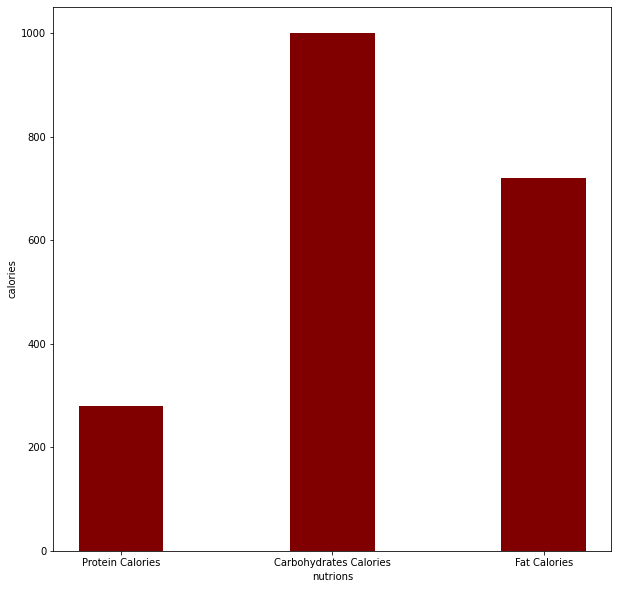

In [ ]:
# creating the bar plot
fig = plt.figure(figsize = (10, 10))
plt.bar(nutrions, calories, color ='maroon',width = 0.4)
plt.xlabel("nutrions")
plt.ylabel("calories")
plt.show()

In [ ]:
def extract_gram(table):
    protein_grams = table['Protein Calories']/4.
    carbs_grams = table['Carbohydrates Calories']/4.
    fat_grams = table['Fat Calories']/9.
    res = {'Protein Grams':protein_grams, 'Carbohydrates Grams':carbs_grams,'Fat Grams':fat_grams}
    return res

In [ ]:
extract_gram(build_nutritional_values(70,2000))

{'Protein Grams': 70.0, 'Carbohydrates Grams': 250.0, 'Fat Grams': 80.0}

In [ ]:
x = extract_gram(build_nutritional_values(70,2000))

In [ ]:
nutrions = list(x.keys())
grams = list(x.values())

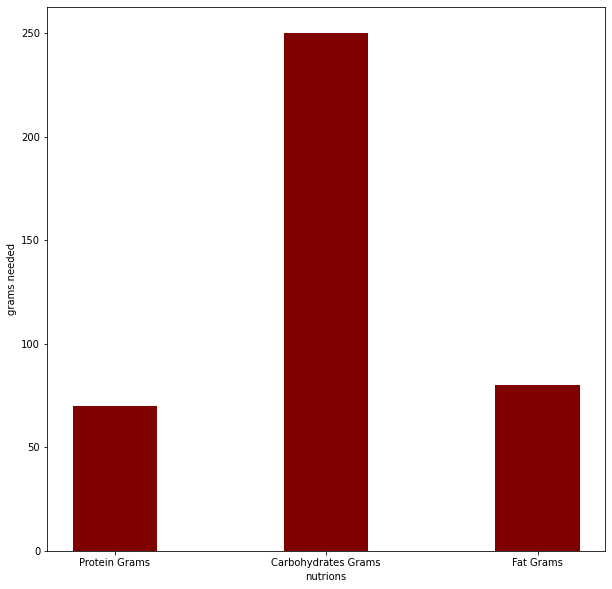

In [ ]:
# creating the bar plot
fig = plt.figure(figsize = (10, 10))
plt.bar(nutrions, grams, color ='maroon',width = 0.4)
plt.xlabel("nutrions")
plt.ylabel("grams needed")
plt.show()

#Optimization

In [ ]:
days_data = random_dataset_day()

In [ ]:
def model(day,kg,calories):
    G = extract_gram(build_nutritional_values(kg,calories))
    E = G['Carbohydrates Grams']
    F = G['Fat Grams']
    P = G['Protein Grams']
    day_data = days_data[day]
    day_data = day_data[day_data.calories!=0]
    food = day_data.name.tolist()
    c  = day_data.calories.tolist()
    x  = pulp.LpVariable.dicts( "x", indices = food, lowBound=0, upBound=1.5, cat='Continuous', indexStart=[] )
    e = day_data.carbohydrate.tolist()
    f = day_data.total_fat.tolist()
    p = day_data.protein.tolist()
    prob  = pulp.LpProblem( "Diet", LpMinimize )
    prob += pulp.lpSum( [x[food[i]]*c[i] for i in range(len(food))]  )
    prob += pulp.lpSum( [x[food[i]]*e[i] for i in range(len(x)) ] )>=E
    prob += pulp.lpSum( [x[food[i]]*f[i] for i in range(len(x)) ] )>=F
    prob += pulp.lpSum( [x[food[i]]*p[i] for i in range(len(x)) ] )>=P
    prob.solve()
    variables = []
    values = []
    for v in prob.variables():
        variable = v.name
        value = v.varValue
        variables.append(variable)
        values.append(value)
    values = np.array(values).round(2).astype(float)
    sol = pd.DataFrame(np.array([food,values]).T, columns = ['Food','Quantity'])
    sol['Quantity'] = sol.Quantity.astype(float)
    sol = sol[sol['Quantity']!=0.0]
    sol.Quantity = sol.Quantity/100
    sol = sol.rename(columns={'Quantity':'Quantity (g)'})
    return sol

In [ ]:
def model(prob, kg,calories,meal,data):
    G = extract_gram(build_nutritional_values(kg,calories))
    E = G['Carbohydrates Grams']
    F = G['Fat Grams']
    P = G['Protein Grams']
    day_data = data
    day_data = day_data[day_data.calories!=0]
    food = day_data.name.tolist()
    c  = day_data.calories.tolist()
    x  = pulp.LpVariable.dicts( "x", indices = food, lowBound=0, upBound=1.5, cat='Continuous', indexStart=[] )
    e = day_data.carbohydrate.tolist()
    f = day_data.total_fat.tolist()
    p = day_data.protein.tolist()
#    prob  = pulp.LpProblem( "Diet", LpMinimize )
    div_meal = meal_split[meal]
    prob += pulp.lpSum( [x[food[i]]*c[i] for i in range(len(food))]  )
    prob += pulp.lpSum( [x[food[i]]*e[i] for i in range(len(x)) ] )>=E*div_meal
    prob += pulp.lpSum( [x[food[i]]*f[i] for i in range(len(x)) ] )>=F*div_meal
    prob += pulp.lpSum( [x[food[i]]*p[i] for i in range(len(x)) ] )>=P*div_meal
    prob.solve()
    variables = []
    values = []
    for v in prob.variables():
        variable = v.name
        value = v.varValue
        variables.append(variable)
        values.append(value)
    values = np.array(values).round(2).astype(float)
    sol = pd.DataFrame(np.array([food,values]).T, columns = ['Food','Quantity'])
    sol['Quantity'] = sol.Quantity.astype(float)
    sol = sol[sol['Quantity']!=0.0]
    sol.Quantity = sol.Quantity*100
    sol = sol.rename(columns={'Quantity':'Quantity (g)'})
    return sol


In [ ]:
def total_model(kg,calories):
    result = []
    for day in week_days:
        prob  = pulp.LpProblem( "Diet", LpMinimize )
        print('Building a model for day %s \n'%(day))
        result.append(model(prob,day,kg,calories))
    return dict(zip(week_days,result))

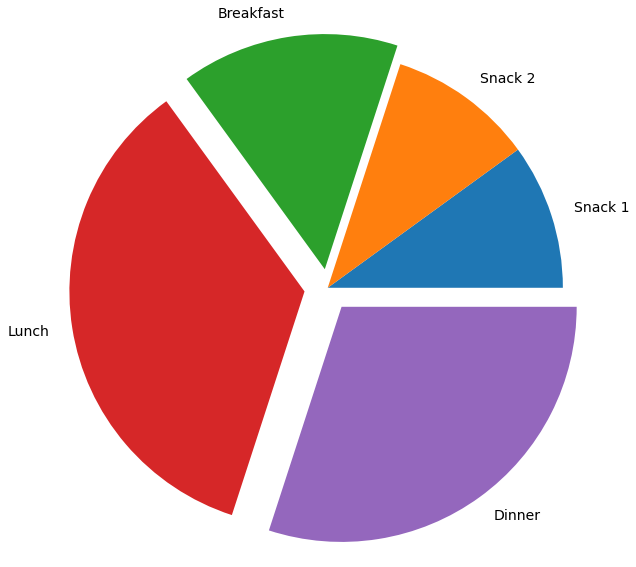

In [ ]:
meal_split = {'Snack 1': 0.10, 'Snack 2':0.10,'Breakfast': 0.15,'Lunch':0.35, 'Dinner':0.30}
labels = []
sizes = []

for x, y in meal_split.items():
    labels.append(x)
    sizes.append(y)

# Plot
plt.figure(figsize=(10,10))
plt.pie(sizes, labels=labels,explode = [0.,0.,0.08,0.1,0.1],textprops={'fontsize': 14})

plt.axis('equal')
plt.show()

In [ ]:
def better_model(kg,calories,day,meal_time):
    days_data = random_dataset_day()
    res_model = []
    for day in week_days:
        day_data = days_data[day]
        meals_data = random_dataset_meal(day_data)
        meal_model = []
        for meal in meals:
            meal_data = meals_data[meal]
            prob  = pulp.LpProblem( "Diet", LpMinimize )
            sol_model = model(prob,kg,calories,meal,meal_data)
            meal_model.append(sol_model)
        res_model.append(meal_model)
    unpacked = []
    for i in range(len(res_model)):
        unpacked.append(dict(zip(meals,res_model[i])))
    unpacked_tot = dict(zip(week_days,unpacked))
    return unpacked_tot[day][meal_time]

In [ ]:
diet = better_model(70,1500,"Monday","Snack 1")


In [ ]:
diet

,Food,Quantity (g)
76,"Babyfood, strained, vegetable and brown rice",18.0
166,"Lentils, with salt, stir-fried, cooked, sprouted",3.0
230,"Fast foods, with chicken, quesadilla",40.0


In [ ]:
import gradio as gr

In [ ]:
weight_input = gr.inputs.Number(label="Weight (in kg)")
calories_input = gr.inputs.Number(label="Intake of calories")
day_input = gr.inputs.Dropdown(choices=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], label="Choose a day")
meal_input = gr.inputs.Dropdown(choices=["Breakfast", "Lunch", "Dinner","Snack 1", "Snack 2"], label="Choose a meal")


/usr/local/lib/python3.9/dist-packages/gradio/inputs.py:59: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.9/dist-packages/gradio/inputs.py:217: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(


In [ ]:
output_text = gr.outputs.Textbox(label="Meal Plan")

/usr/local/lib/python3.9/dist-packages/gradio/outputs.py:22: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(


In [ ]:
app = gr.Interface(fn = better_model, inputs=[weight_input,calories_input,day_input,meal_input], outputs=output_text,title="Meal Plan Generator")

In [ ]:
app.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://5575c560688a206b71.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces
